Physics Informed Neural Networks - June 2024

* Dr. Mohammad Samara
* Udemy

Commented by Anthropic's AI, Claude



2D Burgers Equation - Mathematically modeling a heated aluminum rod

* Solving the equation notebook
* Uses numerical equations developed using finite differences

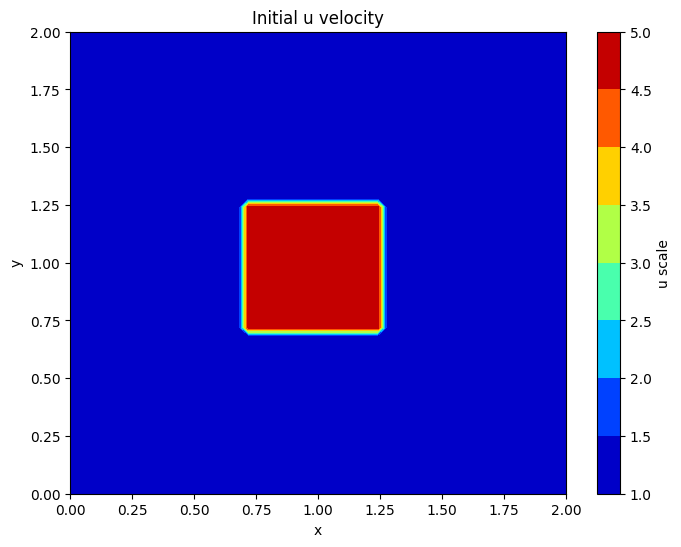

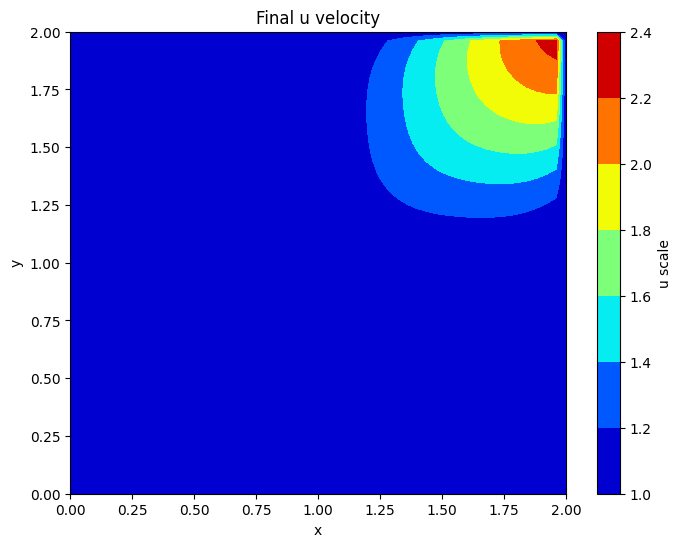

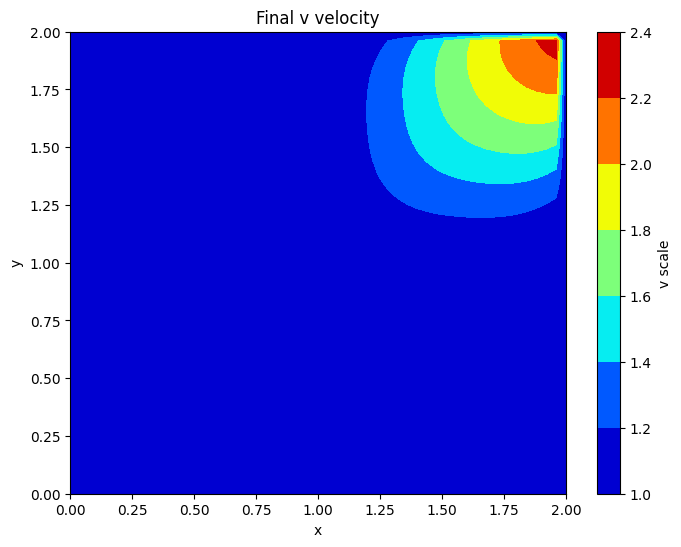

In [1]:
"""
Abstract:

This Python script numerically solves the 2D Burgers equation using the finite difference method to model the velocity
distribution of a fluid flow. The script sets up the domain, initializes the velocity components, and visualizes the
initial and final velocity contour plots.

The Burgers equation is a nonlinear partial differential equation that describes the evolution of a velocity field over time.
In this script, we solve the equation numerically using the explicit finite difference method to model the velocity
distribution in two dimensions (x and y).

"""

# Code Block 1: Import necessary libraries
import numpy as np  # Import the NumPy library for numerical computing
import matplotlib.pyplot as plt  # Import the Matplotlib library for plotting

# Code Block 2: Set up domain and parameters
nx = 51  # Number of grid points along the x direction
ny = 51  # Number of grid points along the y direction
nu = 0.1  # Diffusion coefficient or kinematic viscosity
nt = 500  # Number of time steps
dt = 0.001  # Time step size
dx = 2 / (nx - 1)  # Grid spacing in the x direction (domain is from 0 to 2)
dy = 2 / (ny - 1)  # Grid spacing in the y direction (domain is from 0 to 2)
x = np.linspace(0, 2, nx)  # Array of grid points in the x direction
y = np.linspace(0, 2, ny)  # Array of grid points in the y direction

# Code Block 3: Initialize arrays for velocity components
u = np.ones((ny, nx))  # Current time step for u velocity component
v = np.ones((ny, nx))  # Current time step for v velocity component
un = np.ones((ny, nx))  # Previous time step for u velocity component
vn = np.ones((ny, nx))  # Previous time step for v velocity component
uf = np.ones((nt, ny, nx))  # New time step for u velocity component
vf = np.ones((nt, ny, nx))  # New time step for v velocity component

# Code Block 4: Set initial velocity distribution
# Set initial velocity distribution (higher velocity region in the center)
u[int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5
v[int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5
uf[0, int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5
vf[0, int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5

# Code Block 5: Visualize initial velocity distribution for u component
X, Y = np.meshgrid(x, y)  # Create 2D grid for visualization
plt.figure(figsize=(8, 6))  # Create a new figure with specified size
contour = plt.contourf(X, Y, u[:], cmap='jet')  # Create a contour plot of the velocity distribution
colorbar = plt.colorbar(contour)  # Add a colorbar to the plot
colorbar.set_label("u scale")  # Set the label for the colorbar
plt.title('Initial u velocity')  # Set the title of the plot
plt.xlabel('x')  # Set the label for the x-axis
plt.ylabel('y')  # Set the label for the y-axis
plt.show()  # Display the plot

# Code block 6: Explicit finite difference method
for n in range(1, nt):  # nt = number of time steps, start at 1 since 0 is the initial condition
    un = u.copy()  # Store the previous time step for u velocity component
    vn = v.copy()  # Store the previous time step for v velocity component

    # Walk through the entire mesh (grid) using the discretized finite difference equations
    for i in range(1, nx - 1):  # Walk through x direction (excluding boundary points)
        for j in range(1, ny - 1):  # Walk through y direction (excluding boundary points)
            u[i, j] = (un[i, j] - (un[i, j] * dt / dx * (un[i, j] - un[i-1, j])) -
                       vn[i, j] * dt / dy * (un[i, j] - un[i, j-1]))
            v[i, j] = (vn[i, j] - (un[i, j] * dt / dx * (vn[i, j] - vn[i-1, j])) -
                       vn[i, j] * dt / dy * (vn[i, j] - vn[i, j-1]))
            uf[n, i, j] = u[i, j]  # Save the current time step solution for u velocity component
            vf[n, i, j] = v[i, j]  # Save the current time step solution for v velocity component

    # Update the boundary conditions
    u[:, 0] = 1  # Left boundary
    u[:, -1] = 1  # Right boundary
    u[0, :] = 1  # Top boundary
    u[-1, :] = 1  # Bottom boundary

    v[:, 0] = 1  # Left boundary
    v[:, -1] = 1  # Right boundary
    v[0, :] = 1  # Top boundary
    v[-1, :] = 1  # Bottom boundary

# Code Block 7: Visualize final velocity distribution for u component
X, Y = np.meshgrid(x, y)  # Create 2D grid for visualization
plt.figure(figsize=(8, 6))  # Create a new figure with specified size
contour = plt.contourf(X, Y, u[:], cmap='jet')  # Create a contour plot of the velocity distribution
colorbar = plt.colorbar(contour)  # Add a colorbar to the plot
colorbar.set_label("u scale")  # Set the label for the colorbar
plt.title('Final u velocity')  # Set the title of the plot
plt.xlabel('x')  # Set the label for the x-axis
plt.ylabel('y')  # Set the label for the y-axis
plt.show()  # Display the plot

# Code Block 8: Visualize final velocity distribution for v component
X, Y = np.meshgrid(x, y)  # Create 2D grid for visualization
plt.figure(figsize=(8, 6))  # Create a new figure with specified size
contour = plt.contourf(X, Y, v[:], cmap='jet')  # Create a contour plot of the velocity distribution
colorbar = plt.colorbar(contour)  # Add a colorbar to the plot
colorbar.set_label("v scale")  # Set the label for the colorbar
plt.title('Final v velocity')  # Set the title of the plot
plt.xlabel('x')  # Set the label for the x-axis
plt.ylabel('y')  # Set the label for the y-axis
plt.show()  # Display the plot